In [821]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage import data
import scipy 
import cv2




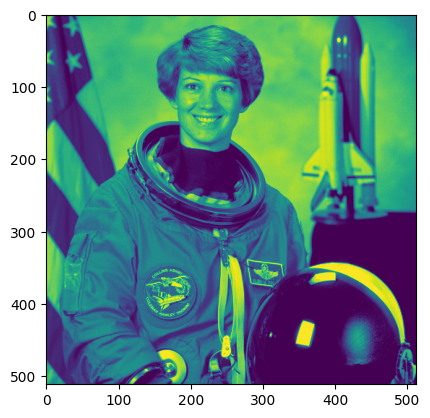

In [822]:
caller = getattr(data, 'astronaut')
X = caller()
plt.figure()
if X.ndim == 2:
    plt.imshow(X, cmap=plt.cm.gray)
else:
    X = cv2.cvtColor(X, cv2.COLOR_BGR2GRAY)
    plt.imshow(X)


    
plt.show()


In [823]:
U, s, VT = np.linalg.svd(X)
m,n = X.shape
S = np.zeros((m, n))
S[:n, :n] = np.diag(s)

In [824]:
print(f"The rank of X is: {np.linalg.matrix_rank(X)}.")

print(X.shape,U.shape,S.shape,VT.shape,s.shape)

The rank of X is: 512.
(512, 512) (512, 512) (512, 512) (512, 512) (512,)


In [825]:
n_dyad = 10
for i in range(n_dyad):
    print(f"{U[:,i]@VT[:,i]}")

0.01629347621644605
0.04214205028846468
-0.0158383355552017
0.0047531487088347995
-0.043613996303183605
-0.026335045629437018
0.02260001637474294
0.09488546708428433
-0.01019623177460438
0.037078422967505145


In [826]:
c = 1
m_k = 0
k = 1
while cf > 0.0001:
    Xk = np.zeros_like(X) 
    Xk = U[:, :k] @ S[:k, :k] @ VT[:k, :]
    cf = 1 - ( (k*(X.shape[0] + X.shape[1] + 1)) / (X.shape[1]*X.shape[0]) )
    k += 1
    m_k = k

t_k = 512
Xk = np.zeros_like(X) 
Xk = U[:, :t_k] @ S[:t_k, :t_k] @ VT[:t_k, :]
sc = np.linalg.norm(X - Xk)
print(sc)

4.1692540545869453e-10




Shape of X_k: (512, 512). Rank of X_k: 1.
||X - X_k||_2 = 17207.26125654091.
||X - X_k||_F = 31449.99799612171
Compression factor= 0.9960899353027344


Shape of X_k: (512, 512). Rank of X_k: 5.
||X - X_k||_2 = 7570.6548488233175.
||X - X_k||_F = 20240.291276483793
Compression factor= 0.9804496765136719


Shape of X_k: (512, 512). Rank of X_k: 10.
||X - X_k||_2 = 4331.555721603722.
||X - X_k||_F = 14591.645909899073
Compression factor= 0.9608993530273438


Shape of X_k: (512, 512). Rank of X_k: 20.
||X - X_k||_2 = 2402.599691492571.
||X - X_k||_F = 10222.145472847033
Compression factor= 0.9217987060546875


Shape of X_k: (512, 512). Rank of X_k: 30.
||X - X_k||_2 = 1564.0096061798254.
||X - X_k||_F = 7981.0478401025075
Compression factor= 0.8826980590820312


Shape of X_k: (512, 512). Rank of X_k: 50.
||X - X_k||_2 = 984.4611456247204.
||X - X_k||_F = 5612.351438592789
Compression factor= 0.8044967651367188


Shape of X_k: (512, 512). Rank of X_k: 100.
||X - X_k||_2 = 438.316499379569

<Figure size 640x480 with 0 Axes>

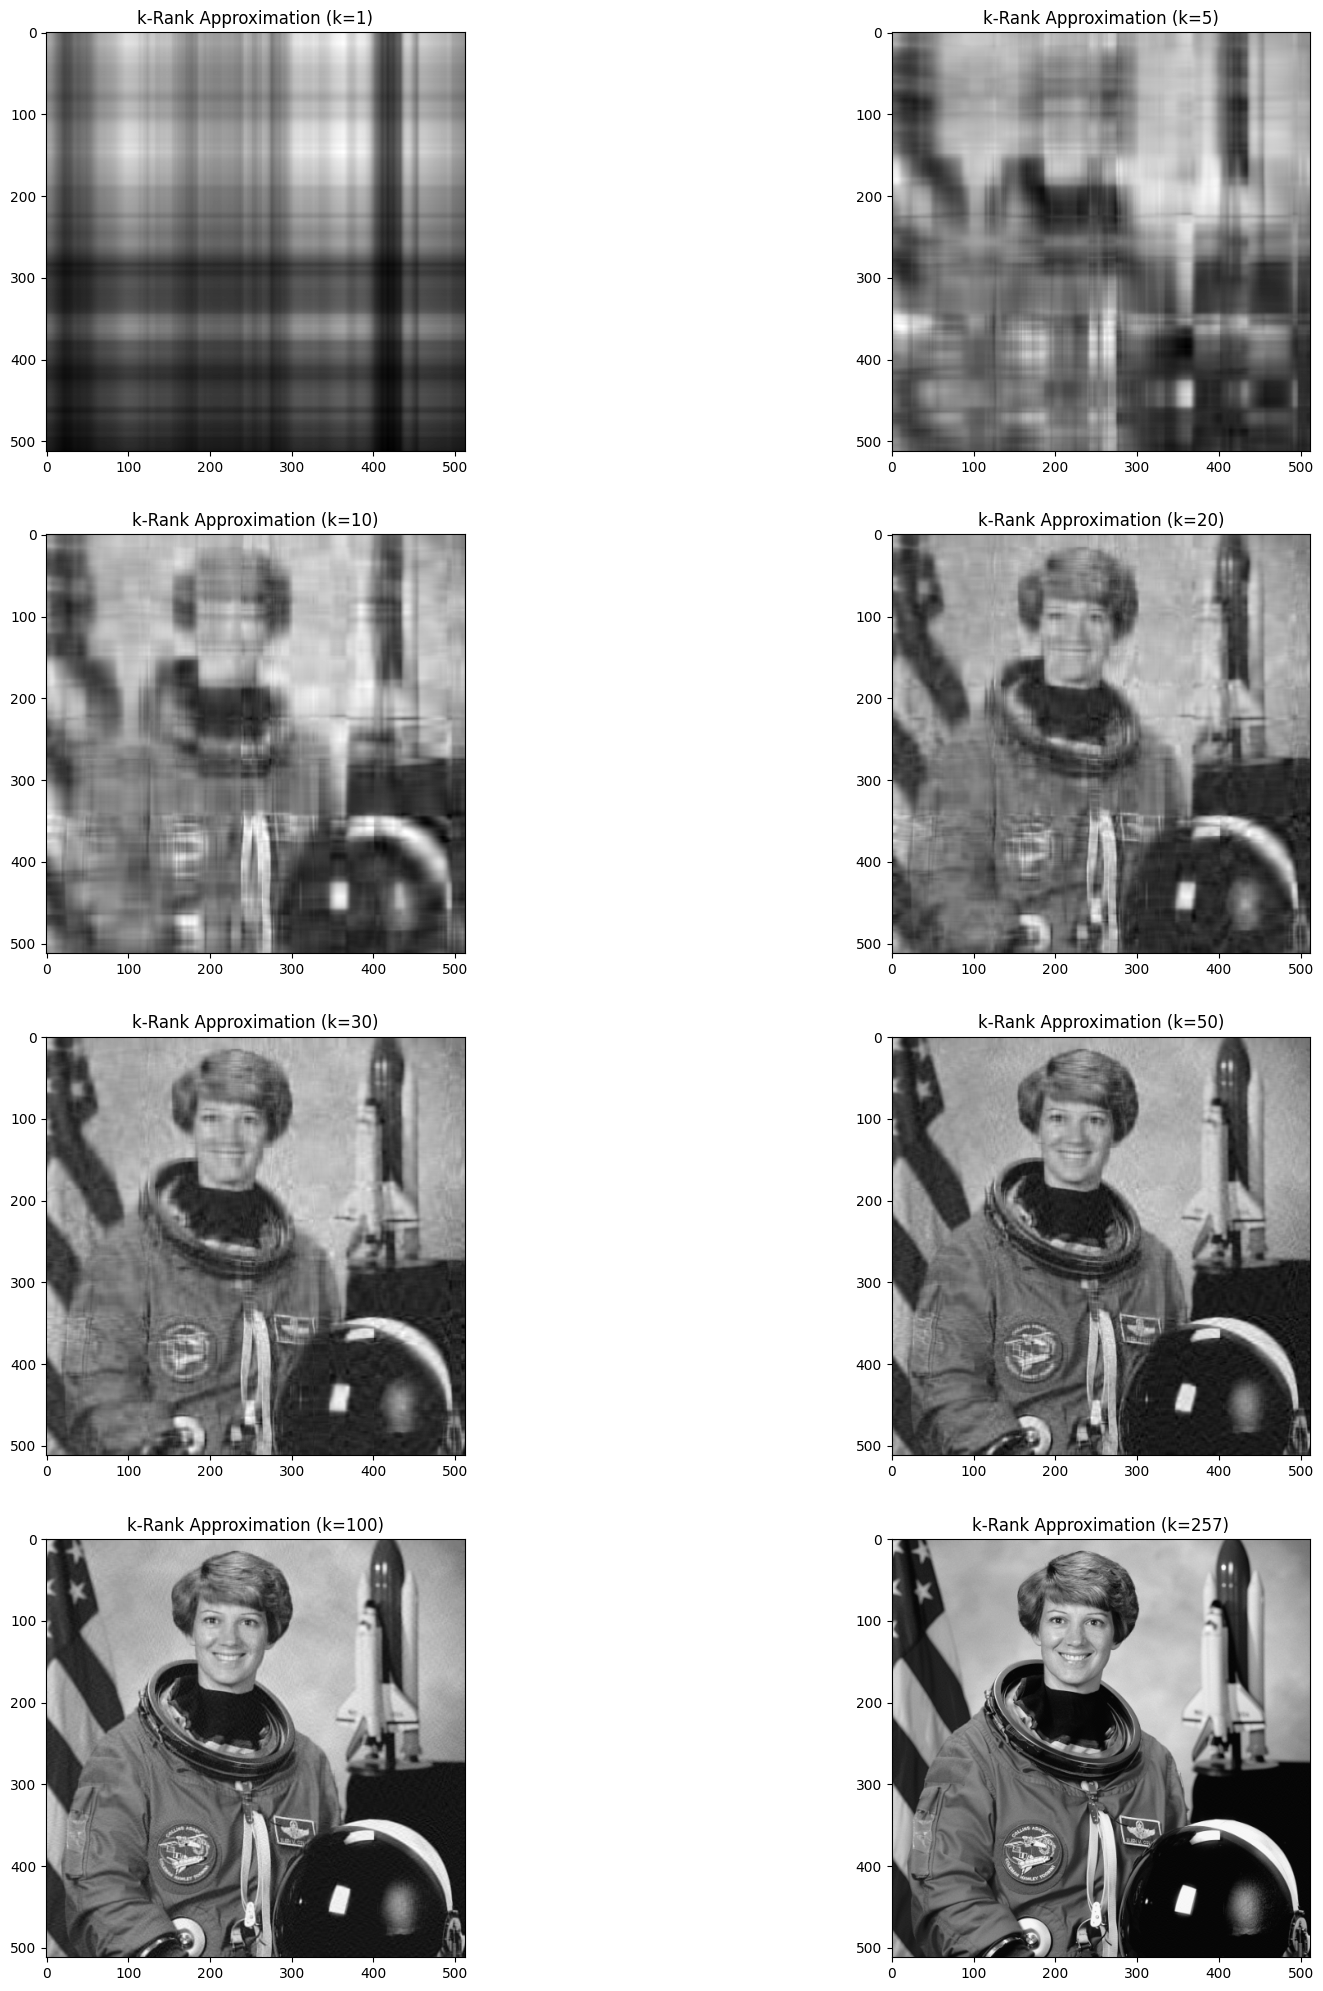

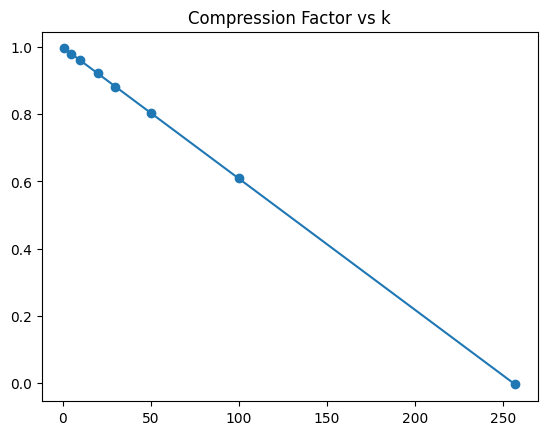

In [827]:
n_diff_k = [1,5,10,20,30,50,100,m_k]
num_rows = len(n_diff_k) // 2 + len(n_diff_k) % 2
plt.figure()
fig, axes = plt.subplots(num_rows, 2, figsize=(20, 25))
i = 1
c_f = []
nor2_error = []
for k in n_diff_k:
    Xk = np.zeros_like(X) 
    Xk = U[:, :k] @ S[:k, :k] @ VT[:k, :]
    cf = 1 - ( (k*(X.shape[0] + X.shape[1] + 1)) / (X.shape[1]*X.shape[0]) )
    c_f.append(cf)

    print('\n')
    print(f"Shape of X_k: {Xk.shape}. Rank of X_k: {np.linalg.matrix_rank(Xk)}.")
    print(f"||X - X_k||_2 = {np.linalg.norm(X - Xk, 2)}.")
    print(f"||X - X_k||_F = {np.linalg.norm(X - Xk, ord='fro')}")
    print(f"Compression factor= {cf}")
    nor2_error.append(np.linalg.norm(X - Xk, 2))
    plt.subplot(num_rows, 2, i)
    plt.imshow(Xk, cmap='gray')
    plt.title(f'k-Rank Approximation (k={k})')
    
    i += 1
plt.show()

plt.plot(n_diff_k, c_f, marker='o')
plt.title('Compression Factor vs k')
plt.show()







In [828]:
s[0:n_diff_k[-1]].shape

(257,)

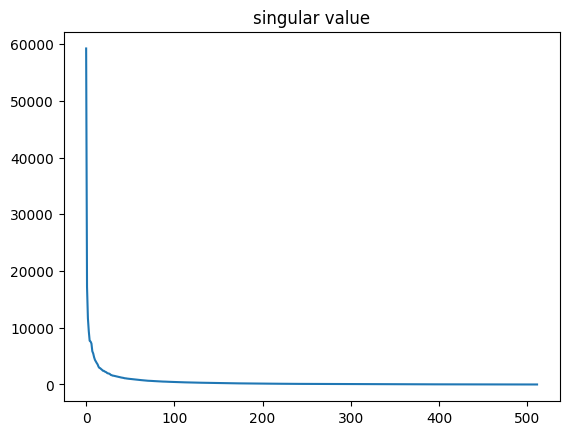

In [829]:
plt.plot(s)
plt.title('singular value')
plt.show()

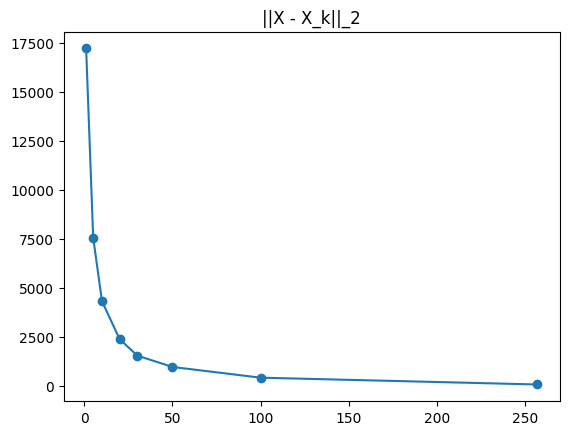

In [830]:
plt.plot(n_diff_k, nor2_error, marker='o')
plt.title('||X - X_k||_2')
plt.show()

Second part

In [831]:
mnist = scipy.io.loadmat('MNIST.mat')


In [832]:
X = (mnist['X'])
I = (mnist['I'])

print("X:", X.shape)
print("I:", I.shape)


X: (256, 1707)
I: (1, 1707)


In [833]:
counter = [0,0,0,0,0,0,0,0,0,0]
i_list = list(I)
for n in range(10):
    counter[n] = np.count_nonzero(I == n)

print(counter)


[319, 252, 202, 131, 122, 88, 151, 166, 144, 132]


<Figure size 640x480 with 0 Axes>

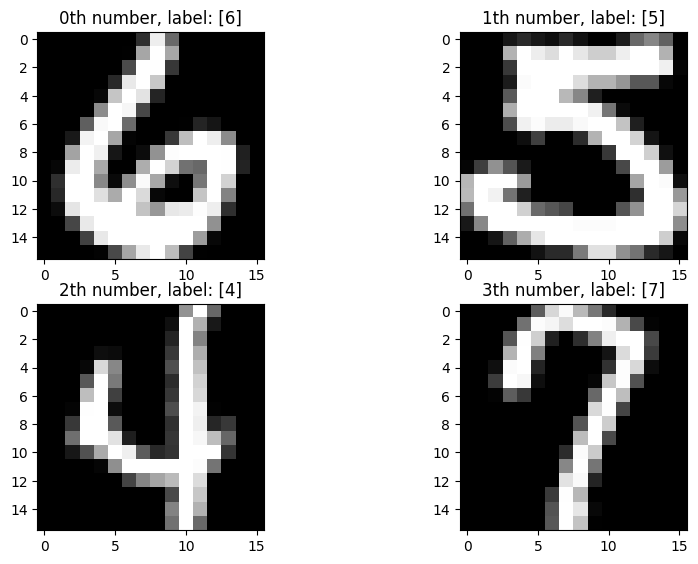

In [834]:
n_visualization = 4
plt.figure()
plt.figure(figsize=(10, 10))


for i in range(n_visualization):
    plt.subplot((n_visualization // 2) + 1, 2, i + 1)
    img = X[:, i]  # Ogni colonna è già un'immagine 1D
    plt.imshow(img.reshape(16, 16), cmap='gray')  # Visualizza l'immagine come 16x16
    plt.title(str(i) + 'th number, label: ' + str(I[:,i]))
plt.show()



In [835]:
#  HERE I CAN CHANGE THE NUMBER
first_n = 3
second_n = 8

if (counter[first_n] < counter[second_n]):
    Ntrain = counter[first_n] - 15
else:
    Ntrain = counter[second_n] - 15


print(type(I),I.shape)
c1_col = np.where(I == first_n)[1]
c2_col = np.where(I == second_n)[1]

print(c1_col.shape, c2_col.shape)
print(c1_col, c2_col)
C1 = X[:,c1_col]
I1 = I[:,c1_col]
C2 = X[:,c2_col]
I2 = I[:,c2_col]


<class 'numpy.ndarray'> (1, 1707)
(131,) (144,)
[   4    6   26   30   35   45   51   74   75  103  109  138  142  159
  165  198  201  249  255  263  320  323  325  349  361  426  440  474
  511  552  567  585  589  591  613  617  623  644  648  653  656  661
  665  666  671  676  681  686  689  692  704  709  712  715  743  757
  787  801  812  832  842  877  891  907  933  946  949  957  977  983
 1020 1041 1071 1096 1134 1139 1147 1209 1217 1226 1255 1261 1265 1300
 1302 1305 1307 1310 1312 1316 1319 1321 1325 1327 1330 1332 1344 1349
 1366 1389 1399 1403 1405 1410 1415 1418 1420 1425 1428 1430 1435 1444
 1448 1475 1503 1508 1518 1521 1527 1544 1551 1555 1562 1573 1579 1582
 1601 1602 1603 1636 1659] [  17   21   24   54   59   61   69   73   77   81   85   87   96  100
  105  110  133  146  151  154  161  163  168  173  191  193  210  216
  230  252  268  269  286  291  293  298  305  308  316  327  337  350
  354  386  396  429  447  457  476  504  527  540  550  555  560  563
  

In [836]:
def split_data_svd(X, Ntrain):
    d, N = X.shape
    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:Ntrain]
    test_idx = idx[Ntrain:]

    Xtrain = X[:, train_idx]
    
    Xtest = X[:, test_idx]

    return Xtrain, Xtest


In [837]:
X1train, X1test= split_data_svd(C1, Ntrain)
X2train, X2test = split_data_svd(C2, Ntrain)

print(X1train.shape, X1test.shape)
print(X2train.shape, X2test.shape)


(256, 116) (256, 15)
(256, 116) (256, 28)


In [838]:
def s_v_d(Matrix):
    U, s, VT = np.linalg.svd(Matrix, full_matrices=False)
    m,n = Matrix.shape
    S = np.zeros((m, n))
    S[:n, :n] = np.diag(s)
    return U, s, S, VT

In [839]:
U1, s1, S1, VT1 = s_v_d(X1train)
U2, s2, S2, VT2 = s_v_d(X2train)
print(U1.shape, s1.shape, S1.shape, VT1.shape)
print(U2.shape, s2.shape, S2.shape, VT2.shape)


(256, 116) (116,) (256, 116) (116, 116)
(256, 116) (116,) (256, 116) (116, 116)


In [840]:

div = X1test.shape[1]
Y = np.concatenate((X1test, X2test), axis=1)


In [841]:
i = 2
l = first_n
if i > div:
    l = second_n

y = Y[:,2]

y1 = U1 @ ((U1.T) @ y)
y2 = U2 @ ((U2.T) @ y)



||y - y2||_2 = 0.7828422646302002.
||y - y2||_2 = 1.4304255917370572.
because of the min bethween d1 and d2 is D1 we can assign y to C1 so it is a ->3<-
and we are rigth


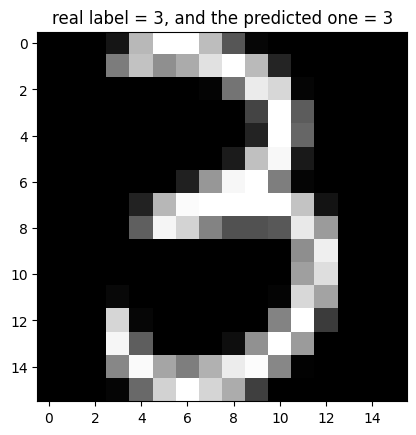

In [842]:
d1 = np.linalg.norm(y - y1, 2)
print(f"||y - y2||_2 = {d1}.")
d2 = np.linalg.norm(y - y2, 2)
print(f"||y - y2||_2 = {d2}.")
if d1 < d2:
    predict = first_n
    print(f"because of the min bethween d1 and d2 is D1 we can assign y to C1 so it is a ->{first_n}<-")
    if l == first_n:
        print(f"and we are rigth")
    else:
        print(f"but we are wrong")
else:
    predict = second_n
    print(f"because of the min bethween d1 and d2 is D2 we can assign y to C2 so it is a ->{second_n}<-")
    if l == second_n:
        print(f"and we are rigth")
    else:
        print(f"but we are wrong")

plt.figure()
img = y 
plt.imshow(img.reshape(16, 16), cmap='gray')
plt.title(f"real label = {l}, and the predicted one = {predict}")
plt.show()

In [843]:
def prediction_of_y(y):
    #print(U1.T.shape, y.shape)
    gf = U1.T @ y
    y1 = U1 @ ((U1.T) @ y)
    y2 = U2 @ ((U2.T) @ y)

    d1 = np.linalg.norm(y - y1, 2)
    d2 = np.linalg.norm(y - y2, 2)
    
    if d1 < d2:
        predict = first_n
    else:
        predict = second_n
    return d1,d2,predict
    


[1.2016948233547962, 1.7901351695961716, 0.7828422646302002, 1.8774905513205715, 1.288851545153504, 1.9754528009675345, 2.174849072186095, 1.6537805824186569, 0.9149084492648667, 1.1382558141882597, 1.0317305429372152, 1.5551541516405165, 0.9483666450430313, 1.4397899601493094, 1.4171288906633936, 1.5583879227579143, 2.521904864436016, 2.044033344264203, 1.45798609407035, 2.029932693449963, 1.7848131688289872, 1.8482154345607609, 1.5199553588372023, 1.4236579818256818, 2.3100017317748236, 2.3411581411758617, 2.2958943614522944, 1.7013006270213398, 2.005739480378905, 2.863844084615539, 1.9264047497439687, 1.853674641165185, 1.663519756455677, 1.5484915766347038, 1.8470700490625156, 1.9117485122308893, 2.080055313704435, 1.4933627716604825, 1.5889762407438857, 1.4932317791104148, 1.8611706484893962, 1.675246726718047, 2.195999919291061] [1.1658796271149836, 2.238828392311122, 1.4304255917370572, 2.658223488915813, 2.420305119608339, 3.4318210303606898, 3.947666119101889, 3.41103658548634

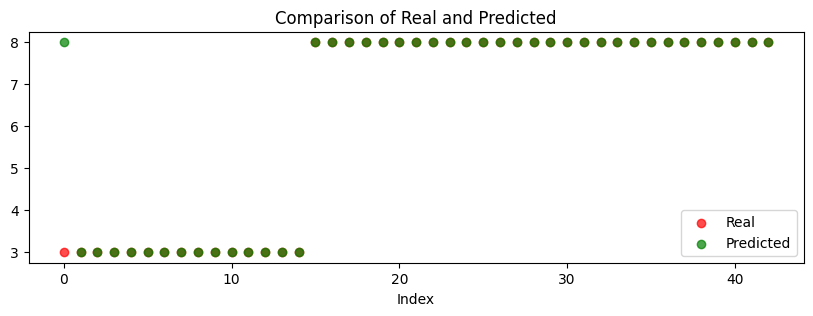

predict_f: [8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
real: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
confronto: [False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
[0]
number 3 errors:  1/15
number 8 errors:  0/28


In [844]:
d1_f = []
d2_f = []
predict_f = []
real_f = []
for i in range((Y.shape[1])):
    d1_p, d2_p, predict_p = prediction_of_y(Y[:,i])
    d1_f.append(d1_p)
    d2_f.append(d2_p)
    predict_f.append(predict_p)
    if i > div-1:
        real_f.append(second_n)
    else:
        real_f.append(first_n)
print(d1_f,d2_f)

confronto = [predict_f[a] == real_f[a] for a in range(len(real_f))]
idx_of_error = [a for a in range(len(real_f)) if predict_f[a] != real_f[a]]

plt.figure(figsize=(10, 3))
plt.scatter(range(len(real_f)), real_f, color='r', label='Real', alpha=0.7)
plt.scatter(range(len(predict_f)), predict_f, color='g', label='Predicted', alpha=0.7)
plt.title('Comparison of Real and Predicted')
plt.xlabel('Index')
plt.legend()
plt.show()

print(f"predict_f: {predict_f}")

print(f"real: {real_f}")
print(f"confronto: {confronto}")

print(idx_of_error)

print(f"number {first_n} errors:  {confronto[:div-1].count(False)}/{real_f.count(first_n)}" )
print(f"number {second_n} errors:  {confronto[div:].count(False)}/{real_f.count(second_n)}" )


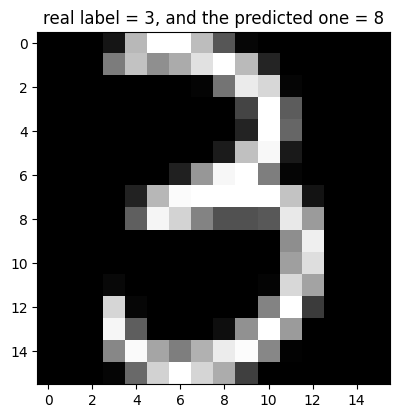

In [846]:
plt.figure(figsize=(10, 10))
for i in range(len(idx_of_error)):
    plt.subplot(len(idx_of_error)//2 + 1, 2, i+1)
    img =  Y[:,2]
    plt.imshow(img.reshape(16, 16), cmap='gray')
    plt.title(f"real label = {real_f[i]}, and the predicted one = {predict_f[i]}")
plt.show()


## with 3

In [847]:
#  HERE I CAN CHANGE THE NUMBER
first_n = 3
second_n = 8
third_n = 6

Ntrain = min(counter[first_n],counter[second_n],counter[third_n])
Ntrain -= 15

# find the columns of the chosen number
print(type(I),I.shape)
c1_col = np.where(I == first_n)[1]
c2_col = np.where(I == second_n)[1]
c3_col = np.where(I == third_n)[1]


# separate the numbers that i choose 
print(c1_col.shape, c2_col.shape, c3_col.shape)
C1 = X[:,c1_col]
I1 = I[:,c1_col]
C2 = X[:,c2_col]
I2 = I[:,c2_col]
C3 = X[:,c3_col]
I3 = I[:,c3_col]

<class 'numpy.ndarray'> (1, 1707)
(131,) (144,) (151,)


In [848]:
# separate training and testing (using precedent function)
X1train, X1test= split_data_svd(C1, Ntrain)
X2train, X2test = split_data_svd(C2, Ntrain)
X3train, X3test = split_data_svd(C3, Ntrain)

print(X1train.shape, X1test.shape)
print(X2train.shape, X2test.shape)
print(X3train.shape, X3test.shape)

(256, 116) (256, 15)
(256, 116) (256, 28)
(256, 116) (256, 35)


In [849]:
# calculate the svd
U1, s1, S1, VT1 = s_v_d(X1train)
U2, s2, S2, VT2 = s_v_d(X2train)
U3, s3, S3, VT3 = s_v_d(X3train)


print(U1.shape, s1.shape, S1.shape, VT1.shape)
print(U2.shape, s2.shape, S2.shape, VT2.shape)
print(U3.shape, s3.shape, S3.shape, VT3.shape)


(256, 116) (116,) (256, 116) (116, 116)
(256, 116) (116,) (256, 116) (116, 116)
(256, 116) (116,) (256, 116) (116, 116)


In [850]:
div1 = X1test.shape[1]-1
div2 = X1test.shape[1]+ X2test.shape[1]-2
Y = np.concatenate((X1test, X2test, X3test), axis=1)
print(div1,div2)

14 41


In [851]:
def prediction_of_y_3(y):
    #print(U1.T.shape, y.shape)    
    y1 = U1 @ ((U1.T) @ y)
    y2 = U2 @ ((U2.T) @ y)
    y3 = U3 @ ((U3.T) @ y)

    d1 = np.linalg.norm(y - y1, 2)
    d2 = np.linalg.norm(y - y2, 2)
    d3 = np.linalg.norm(y - y3, 2)

    d_values = [d1, d2, d3]
    min_value = min(d_values)
    min_index = d_values.index(min_value)

    if min_index == 0:
        predict = first_n
    if min_index == 1:
        predict = second_n
    if min_index == 2:
        predict = third_n
    return d_values, predict
    
    

In [852]:
d_f = []
predict_f = []
real_f = []
print(div1,div2)
for i in range((Y.shape[1])):

    d_p, predict_p = prediction_of_y_3(Y[:,i])
    d_f.append(d_p)

    predict_f.append(predict_p)
    if i <= div1:
        real_f.append(first_n)
        print(i)
    if (i <= div2) & (i > div1):
        real_f.append(second_n)
        print(i)

    if i > div2:
        real_f.append(third_n)
        print(i)


print(d_f,real_f)
confronto = [predict_f[a] == real_f[a] for a in range(len(real_f))]
idx_of_error = [a for a in range(len(real_f)) if predict_f[a] != real_f[a]]


14 41
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
[[1.8830299698903006, 2.559533890237035, 4.335123176707193], [0.9528906560068348, 1.3415733945661739, 2.286390984804981], [1.1795404206826419, 1.876326290595398, 2.5092520758339276], [1.0126343053259859, 2.4184487080174972, 2.3465689364026283], [1.5297877931097092, 3.2336539724042734, 4.2962956717973375], [1.547044152084408, 2.7301605622346425, 4.537138369132174], [1.0845898006742023, 2.0398785811866174, 2.7360010151211345], [1.1202157934841888, 1.4922817181924237, 2.8479482658131587], [1.2239059793153644, 1.3452676906366816, 2.521438741354737], [1.424818867840823, 2.7044009773970714, 2.967285651410278], [0.7718285405299493, 1.8510825037420788, 2.710440194124781], [1.3465740614239972, 2.5477638458819944, 2.8416869554913564], [1.1383414746545895, 1.762319524135

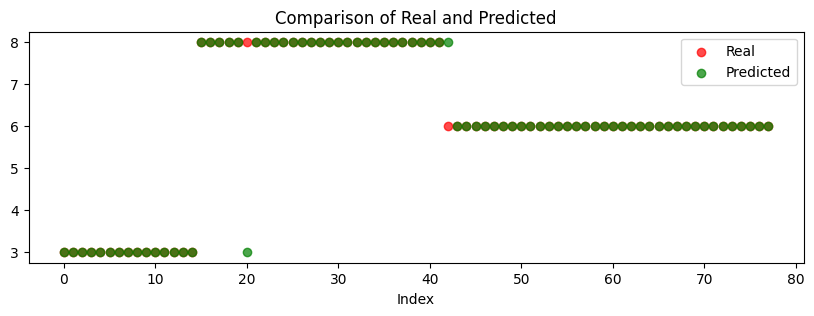

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
[20, 42]


In [853]:
plt.figure(figsize=(10, 3))
plt.scatter(range(len(real_f)), real_f, color='r', label='Real', alpha=0.7)
plt.scatter(range(len(predict_f)), predict_f, color='g', label='Predicted', alpha=0.7)

plt.title('Comparison of Real and Predicted')
plt.xlabel('Index')
plt.legend()
plt.show()

print(predict_f)
print(real_f)
print(confronto)
print(idx_of_error)


# PCA



In [854]:
data = pd.read_csv("data.csv")
print(data.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [855]:
print(f"Shape of the data: {data.shape}")


Shape of the data: (42000, 785)


In [856]:

data_array = np.array(data)
print(data_array.shape)


(42000, 785)


In [857]:
X = data_array[:,1:].T
Y = data_array[:,:1].T  # Y = data_array[:,1] -> (4.. ,) 

# define the shape
d, N = X.shape
print(d,N)
# Isolating the first columns(label) from the dataset 
# I obtain X and Y
# The image in this case are flatted

784 42000


(28, 28)


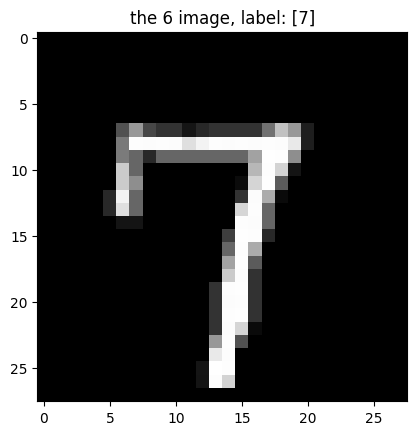

In [858]:
n_for_example = 6
image = X[:,n_for_example] 

image = np.reshape(image, (28,28))
print(image.shape)

plt.figure
plt.imshow(image, cmap='gray')
plt.title(f"the {n_for_example} image, label: {Y[:,n_for_example]}")
plt.show()


In [859]:
print(Y.shape)

(1, 42000)


In [860]:
# before choosing I observe the frequancy of the numbr

counter = [0,0,0,0,0,0,0,0,0,0]
for n in range(10):
    counter[n] = np.count_nonzero(Y == n)

print(counter)

[4132, 4684, 4177, 4351, 4072, 3795, 4137, 4401, 4063, 4188]


### I SELECT 3,7,8

In [861]:
choosen_num = [3, 7, 8]
idx = np.where(np.isin(Y[0,:], choosen_num))[0] # I obtain the index of choosen number
Y_full = Y
X_full = X
X = X[:,idx] # I discard the other number
Y = Y[:,idx]
d, N = X.shape
print(d,N)

784 12815


In [862]:
def test_train_pca(X, Y,Ntrain):
    print(N)
    idxs = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idxs[:Ntrain]
    test_idx = idxs[Ntrain:]
    # train data
    X_train = X[:,train_idx]
    Y_train = Y[train_idx]
    # test data
    X_test = X[:,test_idx]
    Y_test = Y[test_idx]

    return X_train, Y_train, X_test, Y_test


In [863]:

Ntrain = int((X.shape[1]*0.8))
Y = Y[0,:]
X_train, Y_train, X_test, Y_test = test_train_pca(X,Y,Ntrain)

print(f"X_train.shape:{X_train.shape}")
print(f"Y_train.shape:{Y_train.shape}")
print(f"X_train.shape:{X_test.shape}")
print(f"X_train.shape:{Y_test.shape}")

12815
X_train.shape:(784, 10252)
Y_train.shape:(10252,)
X_train.shape:(784, 2563)
X_train.shape:(2563,)


In [864]:
U, s, VT = np.linalg.svd(X_train, full_matrices=False)
k = 2
Uk = U[:,:k]

Z_train = Uk.T @ X_train
Z_test = Uk.T @ X_test

print(Z_train.shape, Z_test.shape)
print(Z_test)

(2, 10252) (2, 2563)
[[-1206.64013191 -1245.25397178 -2207.73728663 ... -1500.33633341
  -1363.23323289 -1805.37765586]
 [-1002.30434245   414.18804067   583.5056705  ...   249.42627788
    709.73021091 -1114.41786376]]


In [865]:
idx_first = np.where(Y_train == choosen_num[0])[0]
idx_second = np.where(Y_train == choosen_num[1])[0]
idx_third = np.where(Y_train == choosen_num[2])[0]

print(type(idx_first))
print(len(idx_first) + len(idx_second) + len(idx_third))
print(idx_first)

<class 'numpy.ndarray'>
10252
[    1     2     4 ... 10243 10245 10251]


In [866]:
X_first = X_train[:,idx_first]
X_second = X_train[:,idx_second]
X_third = X_train[:,idx_third]

print(X_first.shape, X_second.shape, X_third.shape)

(784, 3470) (784, 3520) (784, 3262)


(784,) (784,) (784,)


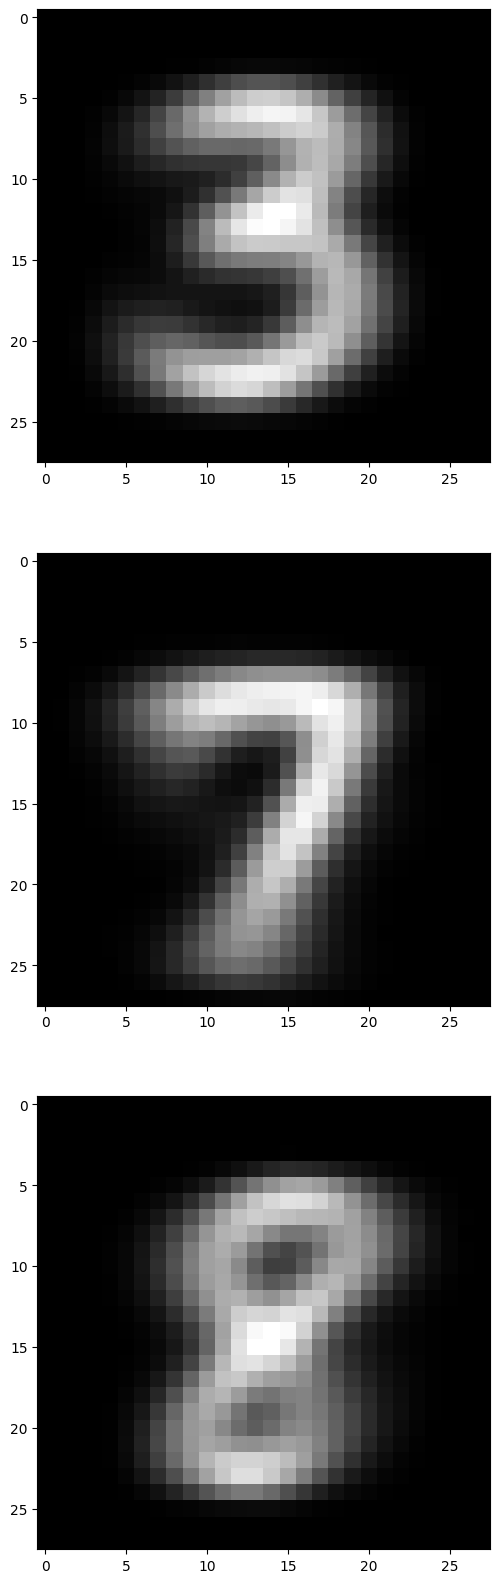

In [867]:
# centroid
centroid_first = np.mean(X_first, axis=1)
centroid_second = np.mean(X_second, axis=1)
centroid_third = np.mean(X_third, axis=1)

print(centroid_first.shape, centroid_second.shape, centroid_third.shape)

img1 = np.reshape(centroid_first, (28, 28))
img2 = np.reshape(centroid_second, (28, 28))
img3 = np.reshape(centroid_third, (28, 28))
l_img = [img1,img2,img3]
i = 1
plt.figure(figsize=(20,20)) 
for a in l_img:
    plt.subplot(3,1,i)
    i += 1
    plt.imshow(a, cmap='gray')
plt.show()


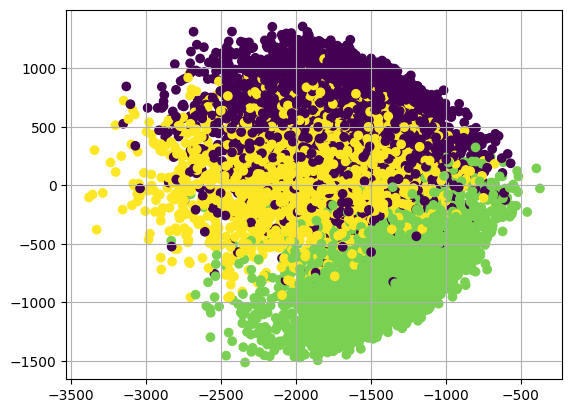

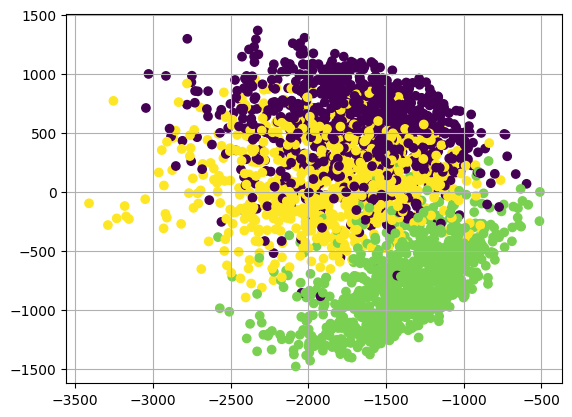

In [868]:
# Visualize the clusters
plt.figure()
plt.scatter(Z_train[0, :], Z_train[1, :], c=Y_train) 
plt.grid()
plt.show()

plt.figure()
plt.scatter(Z_test[0, :], Z_test[1, :], c=Y_test) 
plt.grid()
plt.show()


In [869]:
Z_t_first = Z_train[:,Y_train == choosen_num[0]]
Z_t_second = Z_train[:,Y_train == choosen_num[1]]
Z_t_third = Z_train[:,Y_train == choosen_num[2]]

Z1 = np.mean(Z_t_first, axis=1)
Z2 = np.mean(Z_t_second, axis=1)
Z3 = np.mean(Z_t_third, axis=1)

Z_C_first = Uk.T @ centroid_first
Z_C_second = Uk.T @ centroid_first
Z_C_third = Uk.T @ centroid_first

print(Z_t_third)

[[-2408.78364457 -1614.1792319  -1480.60481049 ... -1369.58943885
  -1442.91826921 -1523.40222234]
 [ -606.0923722     36.49132297  -126.91799885 ...   122.25193361
    -45.49929654   -63.37099783]]


In [870]:
# distanza dal centroide
distances_first = np.empty_like(Z_t_first)
for i in range(Z_t_first.shape[1]):
    distances_first[:, i] = np.linalg.norm(Z_t_first[:, i] - Z1, axis=0)

distances_second = np.empty_like(Z_t_second)
for i in range(Z_t_second.shape[1]):
    distances_second[:, i] = np.linalg.norm(Z_t_second[:, i] - Z2, axis=0)

distances_third = np.empty_like(Z_t_third)
for i in range(Z_t_third.shape[1]):
    distances_third[:, i] = np.linalg.norm(Z_t_third[:, i] - Z3, axis=0)


avg_distance_first = np.mean(distances_first)
avg_distance_second = np.mean(distances_second)
avg_distance_third = np.mean(distances_third)

print("distance of first cluster:", avg_distance_first)
print("distance of second cluster:", avg_distance_second)
print("distance of third:", avg_distance_third)

distance of first cluster: 500.21451397547384
distance of second cluster: 427.4572520959723
distance of third: 478.20082436439856


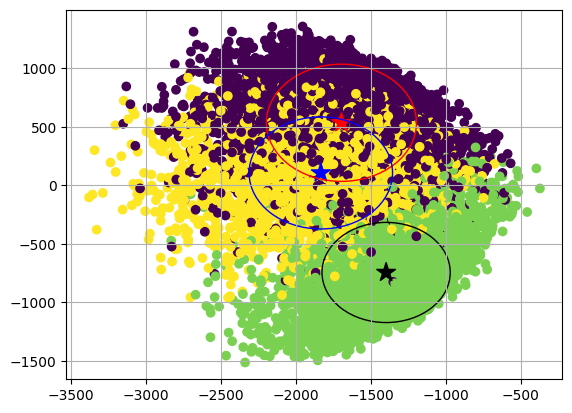

In [871]:

plt.figure()
plt.scatter(Z_train[0, :], Z_train[1, :], c=Y_train) 
colors = ['red', 'black', 'blue']

red_points = np.array([Z1, Z2, Z3])
plt.scatter(red_points[:, 0], red_points[:, 1], color=colors, marker='*', s=200)

radius = [avg_distance_first,avg_distance_second,avg_distance_third] 
r = 0
for p in red_points:
    circle = plt.Circle((p[0], p[1]), radius[r], color=colors[r],fill=False)
    plt.gca().add_patch(circle)
    r += 1


plt.grid()
plt.show()

In [872]:

def class_with_centroid(Z):
    distances_f_c = [0,0,0]
    distances_f_c[0] = np.linalg.norm(Z - Z1, axis=0)
    distances_f_c[1] = np.linalg.norm(Z - Z2, axis=0)
    distances_f_c[2] = np.linalg.norm(Z - Z3, axis=0)
    return np.argmin(distances_f_c)

    




In [873]:
print(Z_test.shape)
P = []
for i in (range(Z_test.shape[1])):
    p = class_with_centroid(Z_test[:,i])    
    P.append(choosen_num[p])
print(type(Y_test))
print(len(P))

Pa = np.array(P)
score = np.mean(Pa == Y_test)
corretti = np.sum(Pa == Y_test)
sbagliati = len(Pa) - corretti

print(corretti)
print(sbagliati)
print(f"correct: {corretti}/{len(Pa)} \nnumber of error: {sbagliati}/{len(Pa)}\nscore finale: {score}")

(2, 2563)
<class 'numpy.ndarray'>
2563
0.7982832618025751
2046
517
correct: 2046/2563 
number of error: 517/2563
score finale: 0.7982832618025751


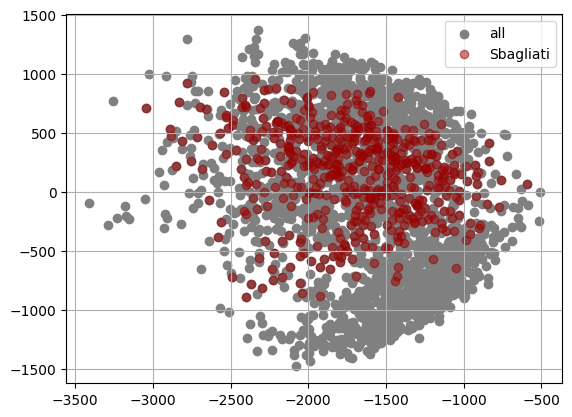

In [874]:
plt.scatter(Z_test[0, :], Z_test[1, :], c='gray', label='all')

indici_sbagliati = np.where(Pa != Y_test)[0]

plt.scatter(Z_test[0, indici_sbagliati], Z_test[1, indici_sbagliati], c='#990000', label='Sbagliati', alpha=0.5)

plt.grid()
plt.legend()
plt.show()

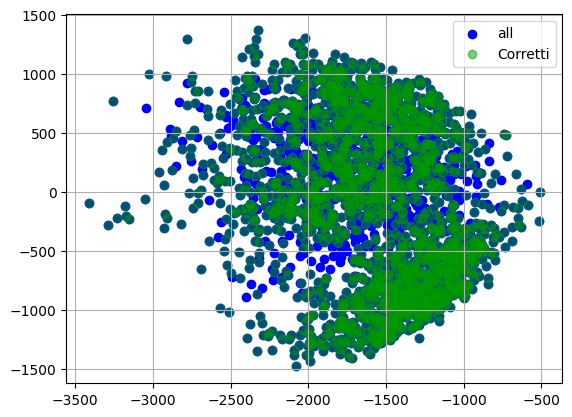

In [875]:
plt.scatter(Z_test[0, :], Z_test[1, :], c='blue', label='all')
indici_corretti = np.where(Pa == Y_test)[0]
plt.scatter(Z_test[0, indici_corretti], Z_test[1, indici_corretti], c='#009900', label='Corretti',alpha=0.5)

plt.grid()
plt.legend()
plt.show()